In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=pd.read_csv(r'C:\Users\Mrunal Metkar\ML_self_practice\Practice_6_fuel_consum\FuelConsumption.csv')

In [4]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
data.columns


Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.4+ KB


In [7]:
new_data=data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

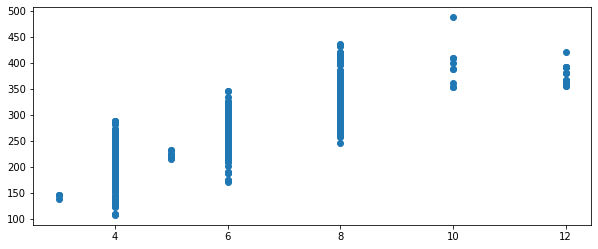

In [10]:
plt.figure(figsize=(10,4))
plt.scatter(new_data['CYLINDERS'],new_data['CO2EMISSIONS'])

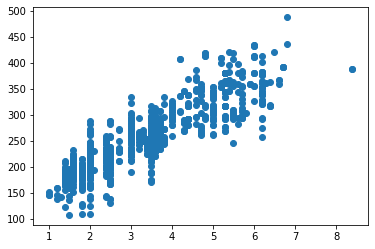

In [11]:
plt.scatter(new_data['ENGINESIZE'],new_data['CO2EMISSIONS'])

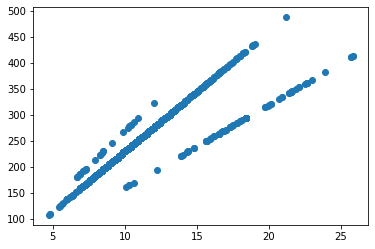

In [12]:
plt.scatter(new_data['FUELCONSUMPTION_COMB'],new_data['CO2EMISSIONS'])

In [14]:
len(new_data)

1067

In [17]:
train=new_data[:int(len(new_data)*0.8)]
test=new_data[int(len(new_data)*0.8):]

In [18]:
train.shape

(853, 4)

In [19]:
test.shape

(214, 4)

In [24]:
type(train)

pandas.core.frame.DataFrame

In [23]:
mean_emission=data['CO2EMISSIONS'].mean()
mean_emission

256.2286785379569

In [43]:
def lin_reg(x,y):
    ##formula for slope is m=(n*sum(x*y)-(sum(x)*sum(y)))/(n*sum(x^2)-((sum(x))^2)).These are 4 terms in slope computed below
    n=len(x)
    first_m_term=n*((x*y).sum())
    sec_m_term=x.sum()*y.sum()
    thrd_m_term=n*((x**2).sum())
    fourth_m_term=(x.sum()**2)
    slope=(first_m_term-sec_m_term)/(thrd_m_term-fourth_m_term)
    intercept=y.mean()-slope*(x.mean())
    return slope,intercept
    

In [44]:
m,c=lin_reg(train['ENGINESIZE'],train['CO2EMISSIONS'])

In [45]:
m

38.79512383605654

In [46]:
c

127.16989950881984

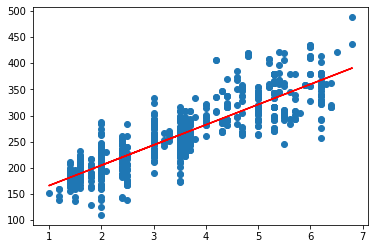

In [51]:
plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'])
plt.plot(train['ENGINESIZE'],m*train['ENGINESIZE']+c,'-r')

In [94]:

def pred_Co2emission(test_var,acc_check,m,c):
    i=0
    i=i+1
    print(i)
    prediction=test_var*m+c
    error=((prediction-acc_check).sum())
    e=error//len(test_var)
    
    return prediction,e

In [96]:
p,e=pred_Co2emission(test['ENGINESIZE'],test['CO2EMISSIONS'],m,c)
e

1


3.0

In [87]:
new_data['CO2EMISSIONS'].head()

0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64